# In-Class Assignment: Exploring Regression Techniques
Objective:
The goal of this assignment is to apply five regression techniques—Multiple Linear Regression (MLR), Stochastic Gradient Descent (SGD), Ridge Regression, Lasso Regression, and Polynomial Regression—on a from Kaggle. You will compare the performance of these models and interpret the results.
https://www.kaggle.com/datasets/CooperUnion/cardataset

### Import necessary libraries

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load a dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/CS430/CarFeaturesAndMSRP/data.csv')

In [ ]:
# Check data
data.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## What are the basic properties of the dataset

- What is the shape of the dataset (number of rows and columns)?
- What are the column names, and what do they represent?
- What is the data type of each column?

The dataset has 11914 rows and 16 columns. the columns names are 'Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'.
       The data types of the columns can be seen below.

In [ ]:
# Find the shape of the dataset (number of rows and columns)
data.shape

(11914, 16)

In [ ]:
# Find the column names, and what they represent
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
# Find the data type of each column
data.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


### Missing Data
- Are there any missing values in the dataset?
- Which columns have missing values, and how many?

The 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', Market Category' columns have missing values. The number of missing values in each column can be seen below.

In [ ]:
# Find which columns have missing values, and how many
data.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


### Descriptive Statistics:
- What are the summary statistics of the numerical columns?
- What are the mean, median, min, max, and standard deviation of the numerical columns?

The mean, medin, min, max, and standard deviation of the numerical columns can be seen below.

In [ ]:
# Find the summary statistics of the numerical columns.
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Target Variable:
How is the target variable distributed?

If the target variable is numerical (e.g., house prices, car prices or insurance charges), plot a histogram to visualize its distribution.

The target variable, 'MSRP', is right skewed. A histogram of 'MSRP' can be seen below. It has a right tail which means that it is skewed to the right.

In [ ]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['MSRP'] = scaler.fit_transform(data[['MSRP']])

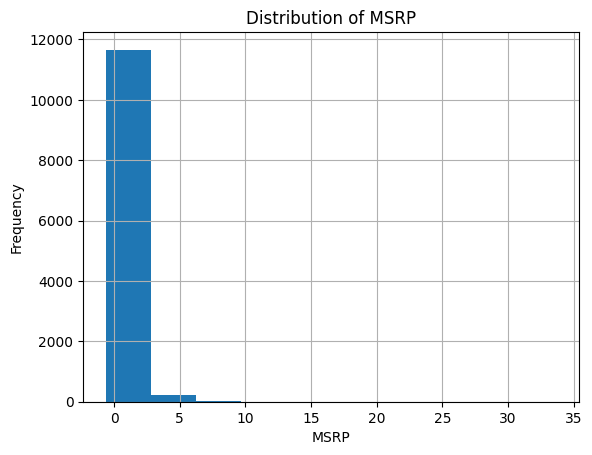

In [ ]:
# Find how MSRP is distributed and plot a histogram to visualize it.
data['MSRP'].hist()
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.title('Distribution of MSRP')
plt.show()


### Relationships Between Features:
- Are there correlations between the numerical variables?

- Are there features that are highly correlated (positively or negatively)?
- How does each feature correlate with the target variable?

Red = positive, Blue = negative, Darker = stronger.


There is a positive correlation between Year and MSRP. Strong positive correlation between MSRP and Engine HP. Weak negative correlation between MSRP and Number of Doors, Highway MPG, City MPG, and Popularity. Engine HP and Engine Cylinders also seem to have a strong positive correlation. Highway MPG and City MPG sem to have a strong negative correlation.

In [ ]:
# Are there correlations between the numerical variables?
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
numeric_data = data[numeric_columns]
correlation_matrix = numeric_data.corr()

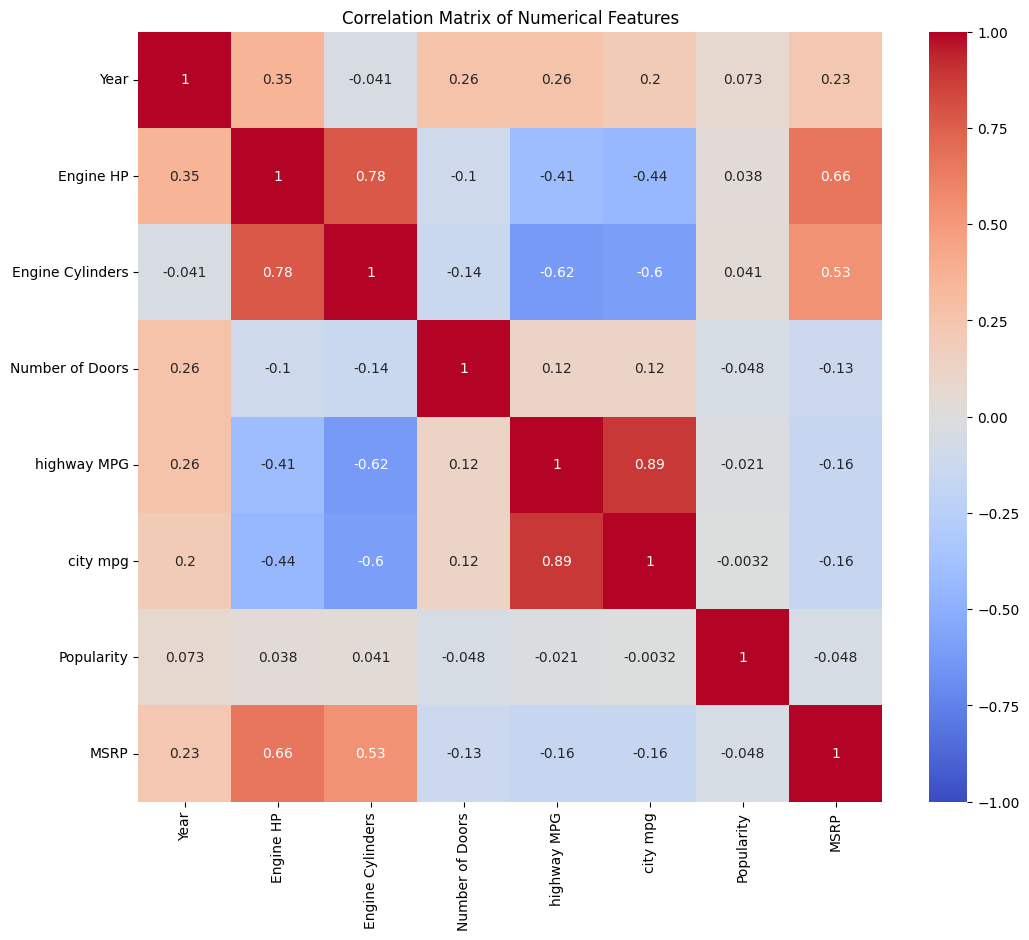

In [ ]:
# Create a heatmap. 1: Strong positive correlation, 0: No correlation, -1: Strong negative correlation
# Red = positive, Blue = negative, Darker = stronger
# Positive correlation between Year and MSRP. Strong positive correlation between MSRP and Engine HP. Weak negative correlation between MSRp and Number of Doors, Highway MPG, City MPG, and Popularity.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax = 1, center = 0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Are there any potential outliers in the dataset?
- Use boxplots or scatter plots to identify potential outliers.
- Should outliers be removed or dealt with in some other way?

There are some outliers in 'Popularity', 'Engine HP', and 'Highway MPG'.

Text(0.5, 0, 'Variables')

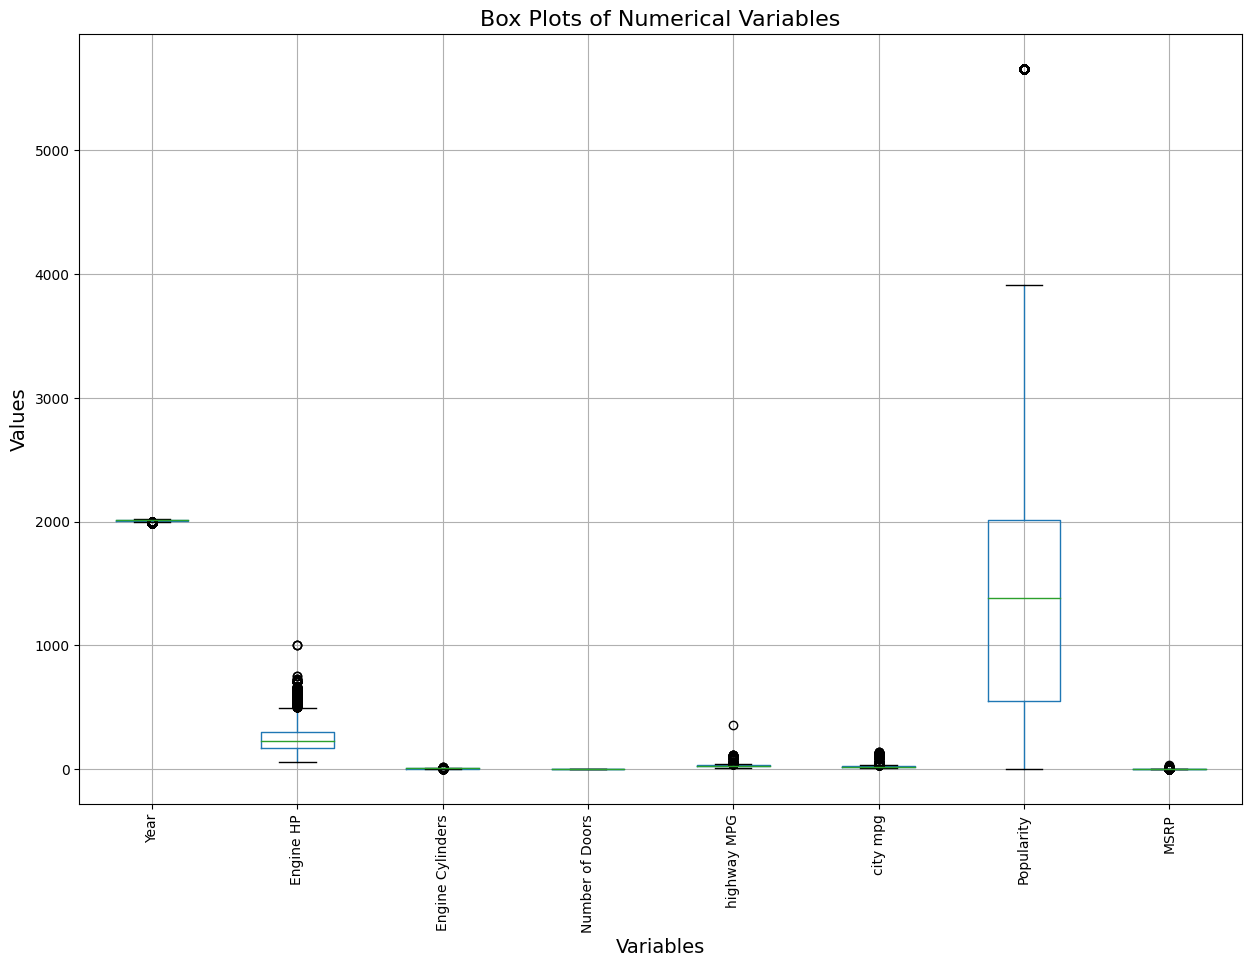

In [ ]:
# Generate a boxplot or scatter plot to identify potential outliers
plt.figure(figsize=(15, 10))
box_plot = data[numeric_columns].boxplot(figsize=(15, 10), rot=90)
plt.title('Box Plots of Numerical Variables', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.xlabel('Variables', fontsize=14)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0, 0.5, 'Value ($)')

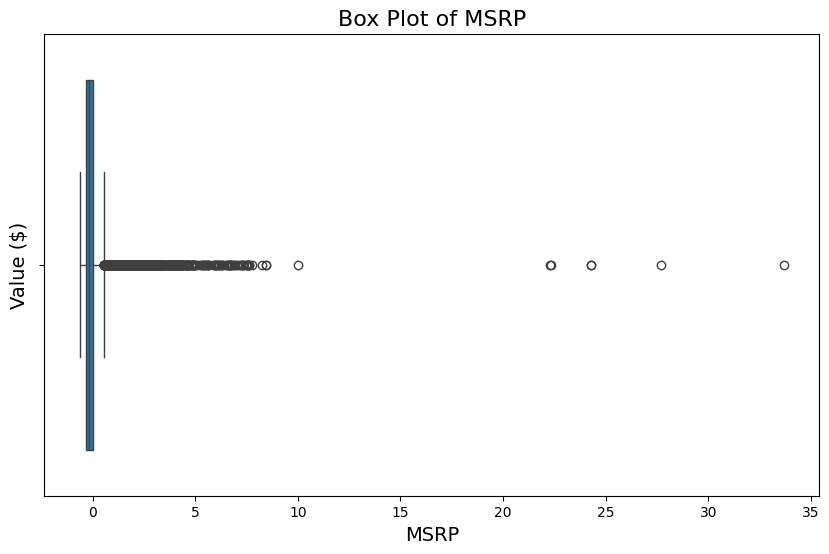

In [ ]:
# Box plot for MSRP
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['MSRP'])
plt.title('Box Plot of MSRP', fontsize=16)
plt.xlabel('MSRP', fontsize=14)
plt.ylabel('Value ($)', fontsize=14)

In [ ]:
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                   9.000000
Engine HP            130.000000
Engine Cylinders       2.000000
Number of Doors        2.000000
highway MPG            8.000000
city mpg               6.000000
Popularity          1460.000000
MSRP                   0.353227
dtype: float64


In [ ]:
outlier = data[((data[numeric_columns]<(Q1 - 1.4 * IQR)) |(data[numeric_columns]>(Q3 + 1.4 * IQR))).any(axis=1)]
print(outlier)

         Make     Model  Year             Engine Fuel Type  Engine HP  \
17       Audi       100  1992             regular unleaded      172.0   
18       Audi       100  1992             regular unleaded      172.0   
19       Audi       100  1992             regular unleaded      172.0   
20       Audi       100  1992             regular unleaded      172.0   
21       Audi       100  1992             regular unleaded      172.0   
...       ...       ...   ...                          ...        ...   
11794  Subaru        XT  1991             regular unleaded      145.0   
11810  Toyota  Yaris iA  2017             regular unleaded      106.0   
11903     BMW        Z8  2001  premium unleaded (required)      394.0   
11904     BMW        Z8  2002  premium unleaded (required)      394.0   
11905     BMW        Z8  2003  premium unleaded (required)      394.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
17                  6.0            MANUAL 

In [ ]:
data_no_outlier = data[~((data[numeric_columns]<(Q1 - 1.4 * IQR)) |(data[numeric_columns]>(Q3 + 1.4 * IQR))).any(axis=1)]
print(data_no_outlier)

          Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driv

Text(0.5, 0, 'Variables')

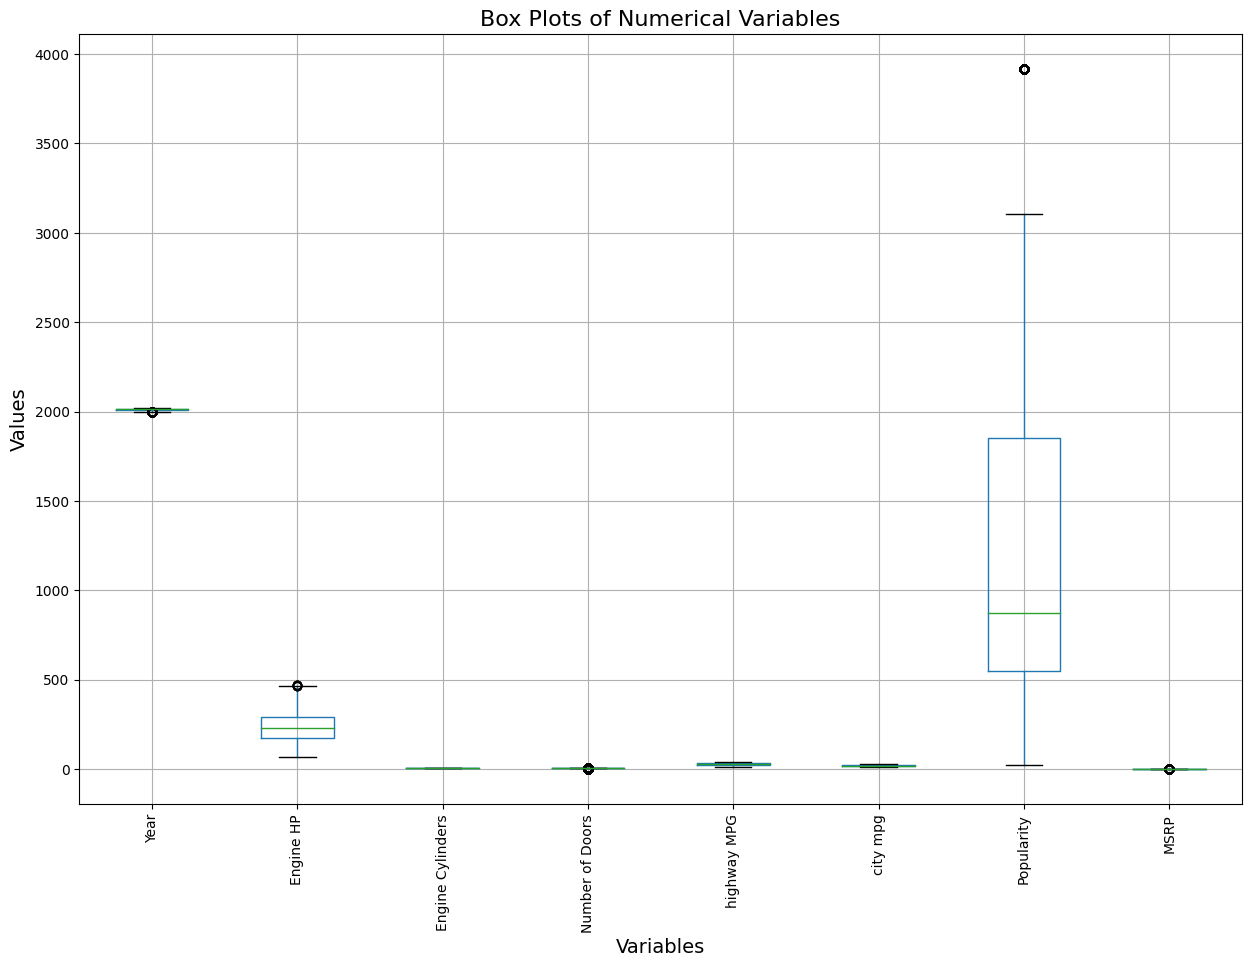

In [ ]:
# Generate a boxplot or scatter plot
plt.figure(figsize=(15, 10))
box_plot = data_no_outlier[numeric_columns].boxplot(figsize=(15, 10), rot=90)
plt.title('Box Plots of Numerical Variables', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.xlabel('Variables', fontsize=14)

### Data Cleaning:
- Are there any issues in the data that need to be cleaned?

- Are there duplicated rows that should be removed?

In [ ]:
print("1. Missing Values:")
print(data.isnull().sum())
print("\nPercentage of missing values:")
print((data.isnull().sum() / len(data) * 100).round(2))

print("\n2. Duplicate Rows:")
print(f"Number of duplicate rows: {data.duplicated().sum()}")

print("\n3. Data Types:")
print(data.dtypes)

print("\n4. Basic Statistics:")
print(data.describe().T)

print("\n5. Unique Values in Categorical Columns:")
for col in data.select_dtypes(include=['object']):
    print(f"\n{col}:")
    print(data[col].value_counts())

print("\n6. Range of Numerical Columns:")
for col in data.select_dtypes(include=['int64', 'float64']):
    print(f"\n{col}:")
    print(f"Min: {data[col].min()}, Max: {data[col].max()}")


1. Missing Values:
Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Percentage of missing values:
Make                  0.00
Model                 0.00
Year                  0.00
Engine Fuel Type      0.03
Engine HP             0.58
Engine Cylinders      0.25
Transmission Type     0.00
Driven_Wheels         0.00
Number of Doors       0.05
Market Category      31.41
Vehicle Size          0.00
Vehicle Style         0.00
highway MPG           0.00
city mpg              0.00
Popularity            0.00
MSRP                  0.00
dtype: float64

2. Duplicate Rows:
Number of duplicate rows: 715

3. Data Types:
Make    

In [ ]:
# Get rid of duplicate rows
data = data_no_outlier.drop_duplicates()

### Split into features and target

In [ ]:
# Split the data into features and taget
X = data.drop('MSRP', axis=1)
y = data['MSRP']

### Feature Engineering

In [ ]:
# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

In [ ]:
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
Categorical features: ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']


### Preprocessing Pipelines

In [ ]:
# Preprocessing pipeline for numerical features
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])




### Create a function to build and evaluate models using pipelines

In [ ]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    try:
        # Fit the model
        model.fit(X_train, y_train)

        # Predict on test set
        y_pred = model.predict(X_test)

        # Evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Get model name
        if isinstance(model, Pipeline):
            model_name = model.steps[-1][1].__class__.__name__
        else:
            model_name = model.__class__.__name__

        print(f"Model: {model_name}")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"R² Score: {r2:.4f}")
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print(f"Model pipeline steps: {model.steps}")
        print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
        print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
    finally:
        print('-' * 50)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model pipelines

In [ ]:
# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Lasso Regression Pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

# Stochastic Gradient Descent (SGD) Pipeline
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))
])
# Polynomial Regression Pipeline (degree=2)
polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])



### Evaluate all models

In [ ]:

for model in [linear_pipeline, ridge_pipeline, lasso_pipeline, sgd_pipeline, polynomial_pipeline]:
    evaluate_model(model, X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Squared Error: 0.0034
R² Score: 0.9441
--------------------------------------------------
Model: Ridge
Mean Squared Error: 0.0036
R² Score: 0.9407
--------------------------------------------------
Model: Lasso
Mean Squared Error: 0.0354
R² Score: 0.4214
--------------------------------------------------
Model: SGDRegressor
Mean Squared Error: 0.0092
R² Score: 0.8493
--------------------------------------------------
Model: LinearRegression
Mean Squared Error: 0.0072
R² Score: 0.8829
--------------------------------------------------


### Interpretation:
Discuss the effectiveness of each model. Which model performed the best and why?

# Linear Regression Model
The Linear Regression Model performed the best because it had the lowest Mean Squared Error of 0.0390 and the highest R^2 score of 0.9709. This means that the model had the lowest average squared difference between the predicted and the actual values. The high R^2 score means that the model explains about 97.09% of the vairance in the target variable which is the best out of all the models. After getting dropping the outliers the MSE was 0.0034 and the R^2 was 0.9441 which makes it the best model still. Linear regression and Ridge are the best models after dropping the outliers.

# Ridge Model
The Ridge Model performed well with a Mean Squared Error of 0.1110 and an R^2 Score of 0.9172 which is also good. However, the Ridge Model did not perform as well as the Linear Regression Model. After dropping the outliers the MSE was 0.0036 and the R^2 was 0.9407 which makes it the second best model. It is very similar in performance to the Linear Regression Model.

# Lasso Model
The Lasso Model performed poorly with a Mean Squared Error of 0.8589 and an R^2 of 0.3595 which means that it did not perform as well as the Linear Regression model. After dropping the outliers the MSE was 0.0354 was improved greatly from before and the R^2 was 0.4214 which increased from before.

# SDG Regressor Model
The SDG Regressor Model performed poorer than the Linear Regression model with a Mean Squared Error of 0.5405 and an R^2 of 0.5970 which shows that the model did not perform well. After dropping the outliers the MSE was 0.0092 and R^2 was 0.8493.

# Polynomial Regression
The Polynomial Regression Model did perform well since the Mean Squred Error was 0.0698 and the R^2 is 0.9479. This model was the second best model after the Linear Regression Model. After dropping the outliers, the MSE was 0.0072 and the R^2 was 0.8829.

### Submission Requirements:

Submit your Jupyter notebook with the code for all models on Moodle using Github.
Include clear markdown cells explaining your approach, observations from EDA, preprocessing steps, and a detailed discussion of the results.